In [5]:
!pip install emoji

In [0]:
import tweepy
import numpy as np
import pandas as pd
import re
import emoji
import csv
import pickle

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
# Step 1 - Authenticate
consumer_key= 'SMVEA3MypMkgOeAGjn75N0gHJ'
consumer_secret= 'skaKGnyqPpzGO9PHubYaEVygai6fQB95ZkZQJrFFYaJfXZvI8J'

access_token='715755192994643968-NgdBmvMLFm7QotE1sZezym6daI0WyOD'
access_token_secret='d9B1xOXUzlgNyGa8Zyex09V6sTz4RUS5a4yPVqwCyiNRV'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#Step2 - Call the API
api = tweepy.API(auth,wait_on_rate_limit=True)

# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [0]:
def preprocess_tweet(tweet):
	tweet.lower()
	tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
	tweet = re.sub('@[^\s]+','AT_USER', tweet)
	tweet = re.sub('[\s]+', ' ', tweet)
	tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
	tweet = (emoji.demojize(tweet))
	tweet = re.sub("\s:"," ", tweet)
	tweet = re.sub(":"," ", tweet)
	
	#removing mentions
	tweet = re.sub(r':', '', tweet)
	tweet = re.sub(r'‚Ä¶', '', tweet)
	
	#replace consecutive non-ASCII characters with a space
	tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
	tweet = re.sub(r"""
              [,.;@#?!&$"']+
              \ *  
              """,
              " ", 
              tweet, flags=re.VERBOSE)

	return tweet

In [0]:
msgs = []
msg =[]
count = 0
number_of_tweets = 2000

for tweet in tweepy.Cursor(api.search, q='#corona', rpp=100, lang="en", tweet_mode='extended').items(number_of_tweets):
    if(tweet.user.location == None or tweet.user.location == "" ):
        continue
    tweet_text = tweet.full_text
    
    tweet_text = preprocess_tweet(tweet_text)
    location = tweet.user.location
    
    location = re.sub(r"""
               [,.;@#?!&$"']+
               \ *  
               """,
               " ", 
               location, flags=re.VERBOSE)
    
    
    msg = [tweet_text, location] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs)

In [12]:
print(len(msgs))

1364


In [13]:
print(msgs[0])

('RT AT_USER It s really worrisome to know about the doctors treating my dad may hv got infected to COVID I join 12 crore Biharis t ', 'Banka India')


In [14]:
print(msgs[2][0])

RT AT_USER What happens when a President ignores his intel agencies  Trump s intelligence briefing book repeatedly cited virus th 


In [0]:
df = pd.DataFrame(msgs, columns = ['Text', 'Location']) 

In [16]:
print(df.head)

<bound method NDFrame.head of                                                    Text                          Location
0     RT AT_USER It s really worrisome to know about...                       Banka India
1     Be Safe and Healthy skysadobe staysafe corona ...                   Bengaluru India
2     RT AT_USER What happens when a President ignor...                      Manhattan NY
3     RT AT_USER It s really worrisome to know about...           Dimapur Nagaland India 
4     Working from home chronicles that awkward mome...                             AbujA
...                                                 ...                               ...
1359  RT AT_USER Sad state of affairs in Maharashtra...            💖 In Vaidehi s Heart 💖
1360  During this pandemic let s stand together to m...                      Mumbai India
1361  AT_USER AT_USER AT_USER 13 more tests +ve for ...                             India
1362  RT AT_USER What happens when a President ignor...               

In [0]:
df.to_csv (r'/content/gdrive/My Drive/dmw_project/tweet_data.csv', index = False, header=True)

In [18]:
df.head

<bound method NDFrame.head of                                                    Text                          Location
0     RT AT_USER It s really worrisome to know about...                       Banka India
1     Be Safe and Healthy skysadobe staysafe corona ...                   Bengaluru India
2     RT AT_USER What happens when a President ignor...                      Manhattan NY
3     RT AT_USER It s really worrisome to know about...           Dimapur Nagaland India 
4     Working from home chronicles that awkward mome...                             AbujA
...                                                 ...                               ...
1359  RT AT_USER Sad state of affairs in Maharashtra...            💖 In Vaidehi s Heart 💖
1360  During this pandemic let s stand together to m...                      Mumbai India
1361  AT_USER AT_USER AT_USER 13 more tests +ve for ...                             India
1362  RT AT_USER What happens when a President ignor...               

In [0]:
emo_repl = {
    #good emotions
    "&lt;3" : " good ",
    ":d" : " good ",
    ":dd" : " good ",
    ":p" : " good ",
    "8)" : " good ",
    ":-)" : " good ",
    ":)" : " good ",
    ";)" : " good ",
    "(-:" : " good ",
    "(:" : " good ",
    
    "yay!" : " good ",
    "yay" : " good ",
    "yaay" : " good ",
    "yaaay" : " good ",
    "yaaaay" : " good ",
    "yaaaaay" : " good ",    
    #bad emotions
    ":/" : " bad ",
    ":&gt;" : " sad ",
    ":')" : " sad ",
    ":-(" : " bad ",
    ":(" : " bad ",
    ":s" : " bad ",
    ":-s" : " bad "
}

emo_repl2 = {
    #good emotions
    "&lt;3" : " heart ",
    ":d" : " smile ",
    ":p" : " smile ",
    ":dd" : " smile ",
    "8)" : " smile ",
    ":-)" : " smile ",
    ":)" : " smile ",
    ";)" : " smile ",
    "(-:" : " smile ",
    "(:" : " smile ",
       
    #bad emotions
    ":/" : " worry ",
    ":&gt;" : " angry ",
    ":')" : " sad ",
    ":-(" : " sad ",
    ":(" : " sad ",
    ":s" : " sad ",
    ":-s" : " sad "
}

#general
re_repl = {
    r"\br\b" : "are",
    r"\bu\b" : "you",
    r"\bhaha\b" : "ha",
    r"\bhahaha\b" : "ha",
    r"\bdon't\b" : "do not",
    r"\bdoesn't\b" : "does not",
    r"\bdidn't\b" : "did not",
    r"\bhasn't\b" : "has not",
    r"\bhaven't\b" : "have not",
    r"\bhadn't\b" : "had not",
    r"\blol\b" : "laugh",
    r"\bwon't\b" : "will not",
    r"\bwouldn't\b" : "would not",
    r"\bcan't\b" : "can not",
    r"\bcannot\b" : "can not"    
}

emo_repl_order = [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl.keys()]))]
emo_repl_order2 = [k for (k_len,k) in reversed(sorted([(len(k),k) for k in emo_repl2.keys()]))]

def replace_emo(sentence):
    sentence2 = sentence
    for k in emo_repl_order:
        sentence2 = sentence2.replace(k,emo_repl[k])
    for r in re_repl:
        repl = re_repl[r]
        sentence2 = re.sub(r,repl,sentence2)
    return sentence2

def replace_reg(sentence):
    sentence2 = sentence
    for k in emo_repl_order2:
        sentence2 = sentence2.replace(k,emo_repl2[k])
    for r in re_repl:
        repl = re_repl[r]
        sentence2 = re.sub(r,repl,sentence2)
    return sentence2

def example():
    op = replace_emo("Hello how are you. Seems you didn't get the answer yet. lol :-) ! ")
    print(op)
    
new_msgs = []
for msg in msgs:
    text = replace_emo(msg[0])
    location  = msg[1]
    msg1 = [text, location] 
    msg1 = tuple(msg1)                    
    new_msgs.append(msg1)

In [0]:
df = pd.DataFrame(msgs, columns = ['Text', 'Location']) 
df.to_csv (r'/content/gdrive/My Drive/dmw_project/tweet_data_no_emotion.csv', index = False, header=True)

In [0]:
def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        fileName = "/content/gdrive/My Drive/dmw_project/slang.txt"
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            dataFromFile = csv.reader(myCSVfile, delimiter="=")
            _str = re.sub('[^a-zA-Z0-9-_.]', '', _str)
            for row in dataFromFile:
                if _str.upper() == row[0]:
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    final_string = ' '.join(user_string)
    return final_string
    
new_msgs1 = []
for msg in new_msgs:
    text = translator(msg[0])
    location  = msg[1]
    msg1 = [text, location] 
    msg1 = tuple(msg1)                    
    new_msgs1.append(msg1)

In [0]:
df = pd.DataFrame(msgs, columns = ['Text', 'Location']) 
df.to_csv (r'/content/gdrive/My Drive/dmw_project/tweet_data_no_emoticon_no_slang.csv', index = False, header=True)

In [0]:
location_based_df = {}
location_based_score = {}

for msg in new_msgs1:
    text = msg[0]
    location = msg[1]
    if(location not in location_based_df):
        location_based_df[location]=[]
        location_based_score[location] =0
    location_based_df[location].append(text)

In [24]:
print(location_based_df)

{'Banka India': ['RT AT_USER It s really worrisome to know about the doctors treating my dad may hv got infected to COVID I join 12 crore Biharis t ', 'RT AT_USER It s really worrisome to know about the doctors treating my dad may hv got infected to COVID I join 12 crore Biharis t '], 'Bengaluru India': ['Be Safe and Healthy skysadobe staysafe corona coronavirus stayhome URL', 'RT AT_USER Ninth case of Corona infection found in Mahadevapura constituency (person who has come from Kerala) The earlier 8 cases o ', 'Control of mind or scared to be quarantined rolling_on_the_floor_laughing  COVID19 LockdownEnd Corona QuarantineWatchParty StayHomeSaveLives pyarselunga_memes URL', 'RT AT_USER Its so Sad  amp Shame esp when dreadful Corona is around us where we are heading Dont forget we all are Humans  amp INDIANS ', 'RT AT_USER AT_USER live chat session moneymanagement during Corona with AT_USER AT_USER URL ht ', 'RT AT_USER 500 Positive Cases reported in the last 12 hrs in India Stay update

In [0]:
# Implemented the code to get the score after iterating over msgs and applying sentimental analysis over it
# subsequently update the location_based_score and find the top 10 elements with highest score which will be the output

**Sentimental Analysis by using our Model**

In [0]:
model = pickle.load(open('/content/gdrive/My Drive/dmw_project/finalized_model.sav', 'rb'))
tfv = pickle.load(open('/content/gdrive/My Drive/dmw_project/finalized_tfv.sav', 'rb'))


In [0]:
def getSentiment(tweet):
  input = [tweet]
  test_data = np.asarray(input)
  features1 = tfv.transform(test_data)
  probability_to_be_positive1 = model.predict_proba(features1)
  # print(probability_to_be_positive1)
  if( probability_to_be_positive1[0][0] > 0.55):
    return 2
  elif(probability_to_be_positive1[0][0] < 0.45):
    return -1
  else:
    return 0

In [28]:
location_based_df

{' India': ['AT_USER 13 more tests +ve for Coronavirus in Agra Total count of +ve cases rises to 401 The count of Deaths in Agra due to Corona stands at 11 AgraNews Covid19 AgraHighlights Sir need you kind attention towards agra ',
  'AT_USER AT_USER AT_USER 13 more tests +ve for Coronavirus in Agra Total count of +ve cases rises to 401 The count of Deaths in Agra due to Corona stands at 11 AgraNews Covid19 AgraHighlights Where is improvement  '],
 ' Pune  India ': ['RT AT_USER Sad state of affairs in Maharashtra Cops are being attacked in cities like Mumbai Pune Aurangabad Corona Numbers are m '],
 ' RF उसी के  D L में': ['RT AT_USER Covid_19  After 25 Cr To PMCaresFund  amp 3 Cr To BMC AkshayKumar Contributes 2 Cr To MumbaiPoliceFoundation AT_USER'],
 ' Rajasthan ': ['RT AT_USER Here s what Panchkula volunteers are doing to stop the spread of corona virus They ve sanitised some sectors directed '],
 ' Scotland': ['RT AT_USER After Corona Now Aliens Pentagon officially confirms  amp r

In [0]:
freq_dict = {}
for key, value in location_based_df.items():
  freq_dict[key] = 0
for key, values in location_based_df.items():
  for tweet in values:
    freq_dict[key] += getSentiment(tweet)

In [0]:
from heapq import nlargest 

In [31]:
top5 = nlargest(5, freq_dict, key = freq_dict.get) 
  
for val in top5: 
    print(val, ":", freq_dict.get(val)) 

San Jose US : 15
India : 14
Bihar India : 14
New Delhi India : 12
Mumbai : 9


**Sentimental Analysis by TextBlob**

In [0]:
 from textblob import TextBlob
 
 def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(tweet) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 1
        elif analysis.sentiment.polarity == 0: 
            return 0
        else: 
            return -1
  

In [33]:
df

,Text,Location
0,RT AT_USER It s really worrisome to know about...,Banka India
1,Be Safe and Healthy skysadobe staysafe corona ...,Bengaluru India
2,RT AT_USER What happens when a President ignor...,Manhattan NY
3,RT AT_USER It s really worrisome to know about...,Dimapur Nagaland India
4,Working from home chronicles that awkward mome...,AbujA
...,...,...
1359,RT AT_USER Sad state of affairs in Maharashtra...,💖 In Vaidehi s Heart 💖
1360,During this pandemic let s stand together to m...,Mumbai India
1361,AT_USER AT_USER AT_USER 13 more tests +ve for ...,India
1362,RT AT_USER What happens when a President ignor...,Lancaster PA


In [0]:
df['Sentiment'] = df.apply(lambda row:get_tweet_sentiment(row['Text']),axis=1)

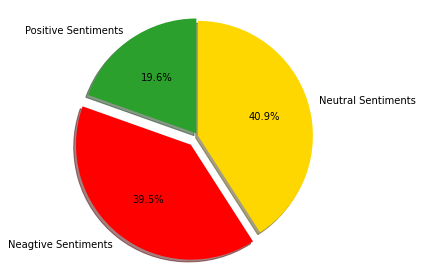

In [35]:
import matplotlib.pyplot as plt

# Pie chart
labels = ['Positive Sentiments', 'Neagtive Sentiments', 'Neutral Sentiments']
sizes =list(df.groupby('Sentiment').size())
colors = ['#2ca02c', '#ff0000', '#ffd700']
explode = (0.025, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=colors,  autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()